# Imports

In [197]:
import essentia
from essentia.standard import *
from pylab import show
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import pandas as pd

# Lineal Sum w/ untouched Phase

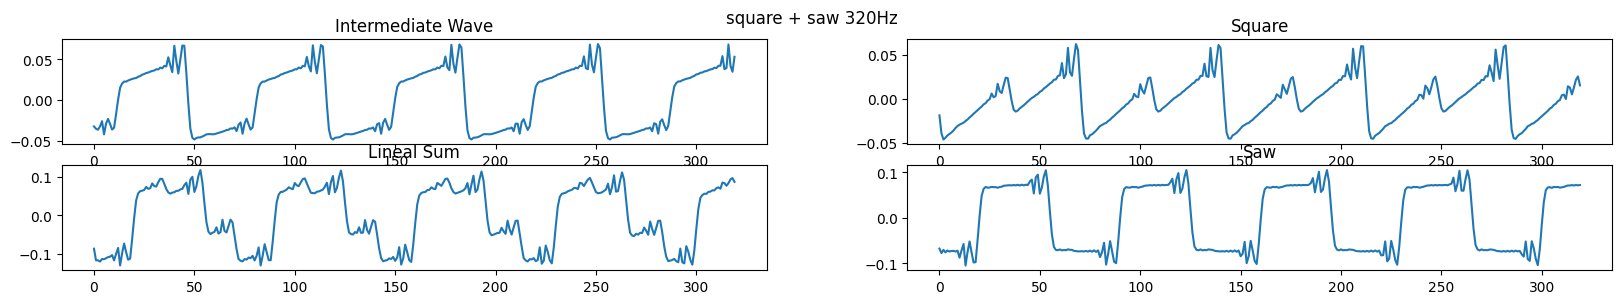

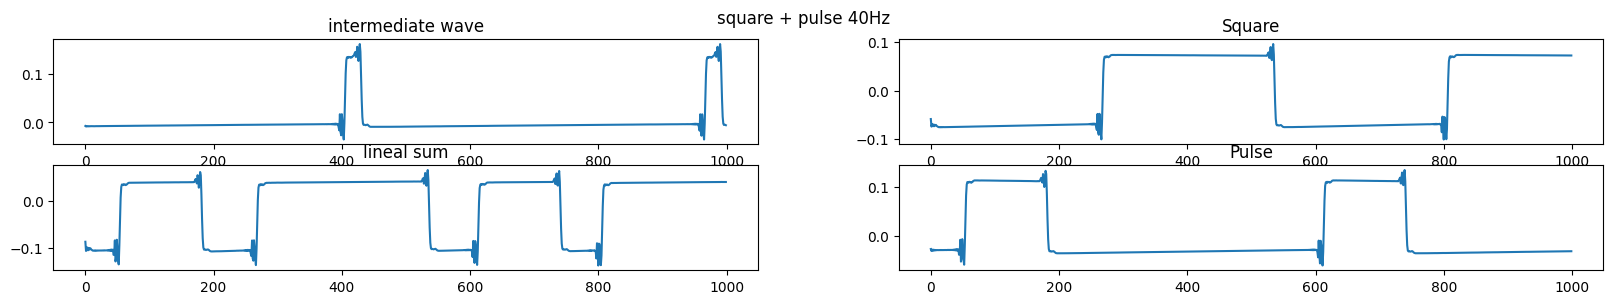

In [198]:
w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
mfcc = MFCC()
fft = FFT()

saw_sqr = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/sawtooth-square/vco1_5.0_saw-sqr.wav')
sqr = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/sawtooth/vco1_5.0_saw.wav')
saw = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/square/vco1_5.0_sqr.wav')

audio_sqr_saw = saw_sqr().copy()
audio_sqr = sqr().copy()
audio_saw = saw().copy()

audio_saw.resize(audio_sqr.shape)
audio_new = audio_sqr + audio_saw

frame_sum = audio_sqr_saw[0:320]
frame_new = audio_new[0:320]
frame_sqr = audio_sqr[0:320]
frame_saw = audio_saw[0:320]

fig, axs = plt.subplots(2, 2)
fig.suptitle('square + saw 320Hz')
axs[0, 0].plot(frame_sum)
axs[0, 0].set_title('Intermediate Wave')
axs[1, 0].plot(frame_new)
axs[1, 0].set_title('Lineal Sum')
axs[0, 1].plot(frame_sqr)
axs[0 ,1].set_title('Square')
axs[1, 1].plot(frame_saw)
axs[1, 1].set_title('Saw')
show()

sqr_pul = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/square-pulse/vco1_2.0_sqr-pul.wav')
sqr_2 = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/square/vco1_2.0_sqr.wav')
pul = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/pulse/vco1_2.0_pul-con.wav')

audio_sqr_pul = sqr_pul().copy()
audio_sqr_2 = sqr_2().copy()
audio_pul = pul().copy()

audio_sqr_2.resize(audio_pul.shape)
audio_new = audio_sqr_2 + audio_pul

frame_sqr_pul = audio_sqr_pul[0:1000]
frame_new = audio_new[0:1000]
frame_sqr = audio_sqr_2[0:1000]
frame_pul = audio_pul[0:1000]

fig, axs = plt.subplots(2, 2)
fig.suptitle('square + pulse 40Hz')
axs[0, 0].plot(frame_sqr_pul)
axs[0, 0].set_title('intermediate wave')
axs[1, 0].plot(frame_new)
axs[1, 0].set_title('lineal sum')
axs[0, 1].plot(frame_sqr)
axs[0, 1].set_title('Square')
axs[1, 1].plot(frame_pul)
axs[1, 1].set_title('Pulse')
show()

# Lineal Sum Changing Phase

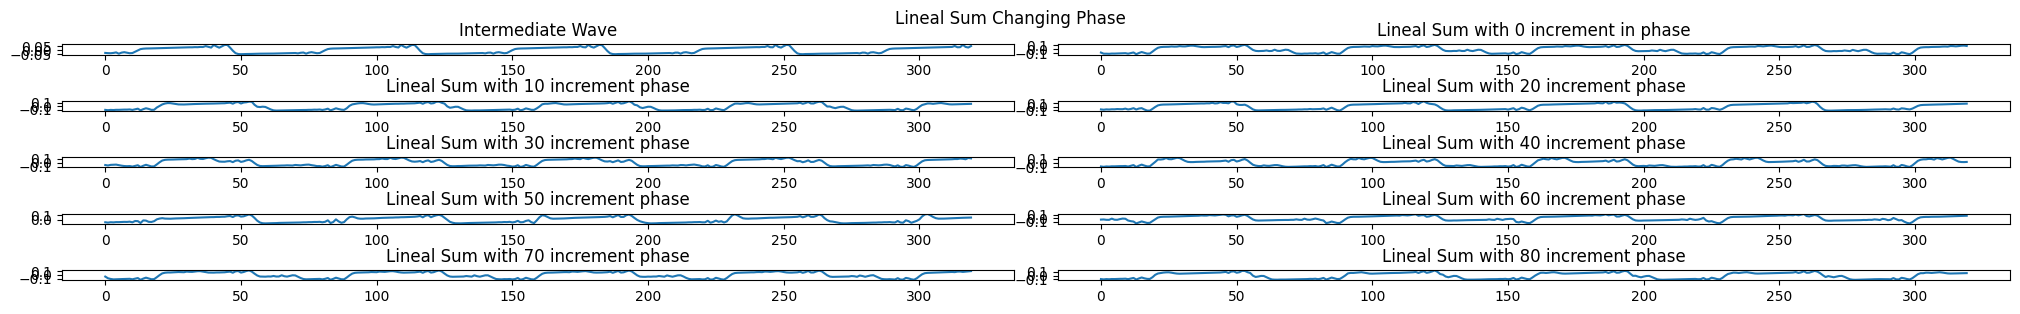

In [199]:
def linealSumPhaseIncrement(audio_inter, audio_1, audio_2, phase_inc, phase_last, phase_init = 0):

    frame_inter = audio_inter[phase_init:phase_last]
    frame_1 = audio_1[phase_init:phase_last]
    frame_2 = audio_2[phase_init:phase_last]
    frame_sum = frame_1 + frame_2

    fig, axs = plt.subplots(5, 2)
    fig.suptitle('Lineal Sum Changing Phase')
    axs[0, 0].plot(frame_inter)
    axs[0, 0].set_title('Intermediate Wave')
    axs[0, 1].plot(frame_sum)
    axs[0, 1].set_title('Lineal Sum with 0 increment in phase')

    phase = phase_inc

    for i in range(1, 5):
        for j in range(2):
            frame_1 = audio_1[phase_init + phase : phase_last + phase]
            frame_sum = frame_1 + frame_2
            axs[i, j].plot(frame_sum)
            axs[i, j].set_title('Lineal Sum with ' + str(phase) + ' increment phase')
            phase += phase_inc
    fig.tight_layout(pad = 0)
    plt.show()

saw_sqr = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/sawtooth-square/vco1_5.0_saw-sqr.wav')
sqr = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/sawtooth/vco1_5.0_saw.wav')
saw = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/square/vco1_5.0_sqr.wav')

audio_inter = saw_sqr().copy()
audio_1 = sqr().copy()
audio_2 = saw().copy()

linealSumPhaseIncrement(audio_inter, audio_1, audio_2, 10, 320, 0)

# Computing Audio

In [200]:
import IPython
saw_sqr = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/sawtooth-square/vco1_5.0_saw-sqr.wav')
sqr = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/sawtooth/vco1_5.0_saw.wav')
saw = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/square/vco1_5.0_sqr.wav')

audio_inter = saw_sqr().copy()
audio_1 = sqr().copy()
audio_2 = saw().copy()

frame_sqr_saw = audio_inter[0:32000]
frame_sum = audio_1[0:32000] + audio_2[50:32050]
frame_sum_displaced = frame_sum[30:32030]



In [201]:
IPython.display.Audio(frame_sqr_saw, rate = 44000)

In [202]:
IPython.display.Audio(frame_sum, rate = 44000)

# Linear Regression

## Multiple Linear Regression

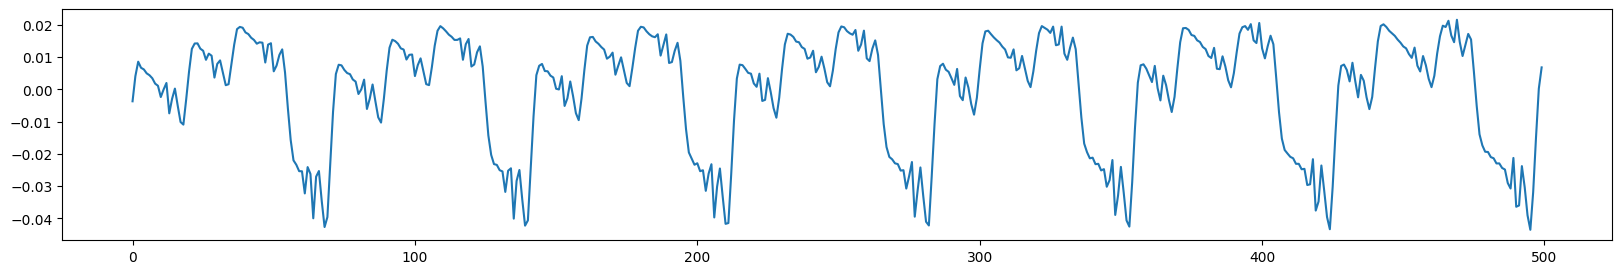

In [209]:
from functions.linear_reg import linear_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

saw_sqr = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/sawtooth-square/vco1_5.0_saw-sqr.wav')
sqr = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/sawtooth/vco1_5.0_saw.wav')
saw = essentia.standard.MonoLoader(filename = 'rsf_kobol_expander_2-vco/audio/vco1/square/vco1_5.0_sqr.wav')

audio_inter = saw_sqr().copy()
audio_sqr = sqr().copy()
audio_saw = saw().copy()

frame_inter = audio_inter[0:500]
frame_sqr = audio_sqr[0:500]
frame_saw = audio_saw[0:500]
frame_sum = frame_saw + frame_sqr

x = pd.DataFrame((frame_sqr, frame_saw)).T
y = pd.DataFrame(frame_inter)

#multiple lineear regression
mlr = LinearRegression()  
mlr.fit(x, y)

y_pred_mlr= mlr.predict(x)

plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_pred_mlr)
plt.show()

## Simple Linear Regression

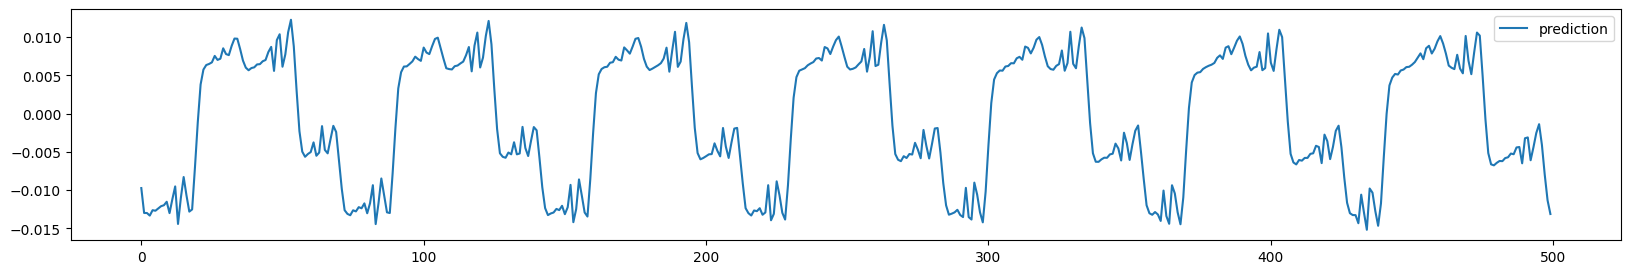

In [214]:
x = pd.DataFrame(frame_sum)
mlr = LinearRegression()  
mlr.fit(x, y)

y_pred_mlr= mlr.predict(x)

plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_pred_mlr, label = 'prediction')
#plt.plot(frame_inter, label = 'intermediate wave')
plt.legend()
plt.show()

## Simple linear regression displaced

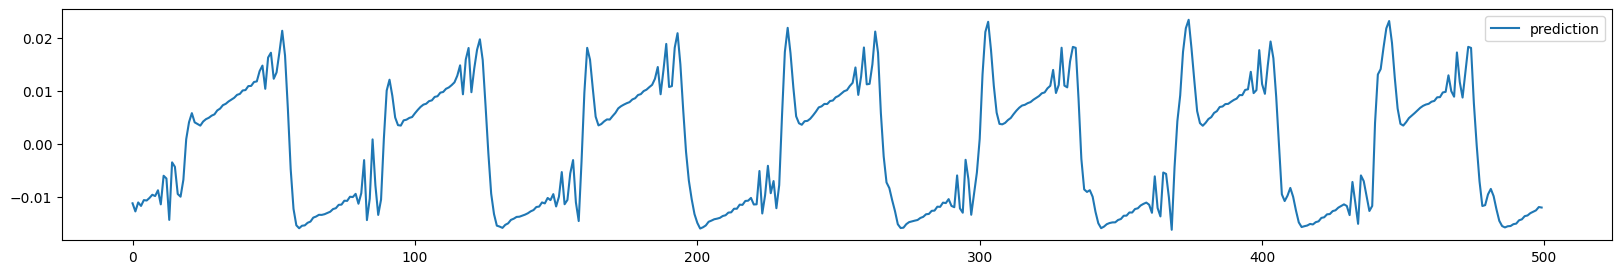

In [216]:
frame_sqr = audio_sqr[50:550]
frame_saw = audio_saw[0:500]
frame_sum = frame_saw + frame_sqr

x = pd.DataFrame(frame_sum)
mlr = LinearRegression()  
mlr.fit(x, y)

y_pred_mlr= mlr.predict(x)

plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_pred_mlr, label = 'prediction')
#plt.plot(frame_inter, label = 'intermediate wave')
plt.legend()
plt.show()